# Zanin's time series

In [1]:
from typing import List
import os
import matplotlib.pyplot as plt

In [2]:
from train_test_utils import LossDistribution

## Logistic map

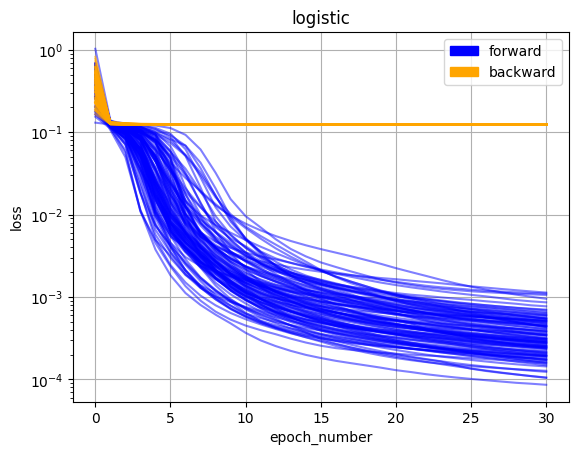

In [3]:
l = LossDistribution("20230626_distributions/logistic.json")
l.plot_learning_curves()

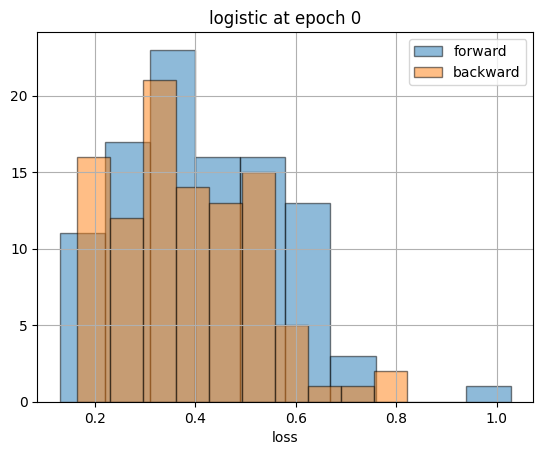

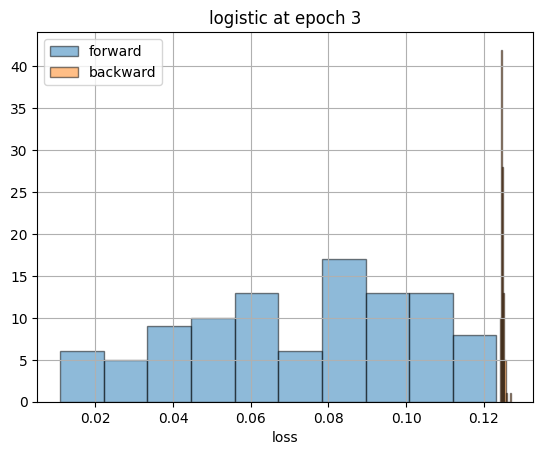

In [4]:
l.plot_distribution_at_epoch(0)
l.plot_distribution_at_epoch(3)

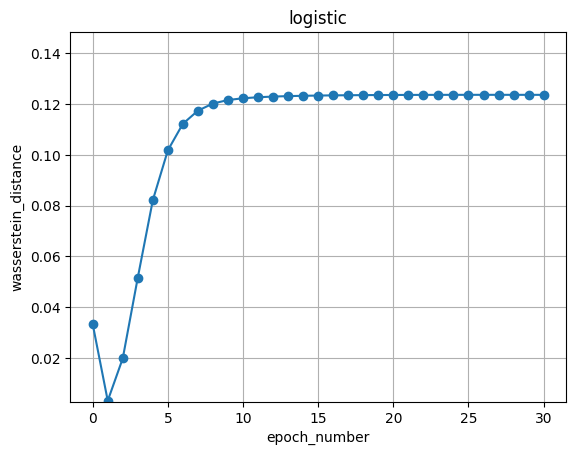

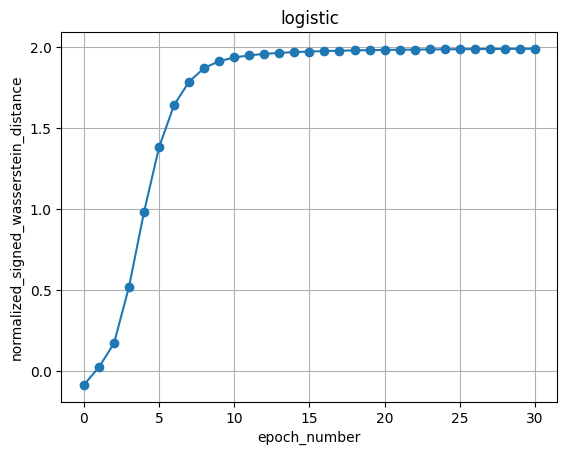

In [5]:
l.plot_wasserstein_vs_epoch()
l.plot_normalized_signed_wasserstein_vs_epoch()

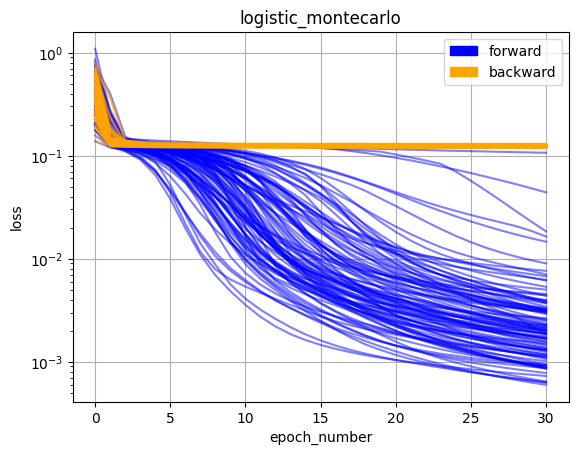

In [6]:
l = LossDistribution("20230626_distributions/logistic_montecarlo.json")
l.plot_learning_curves()

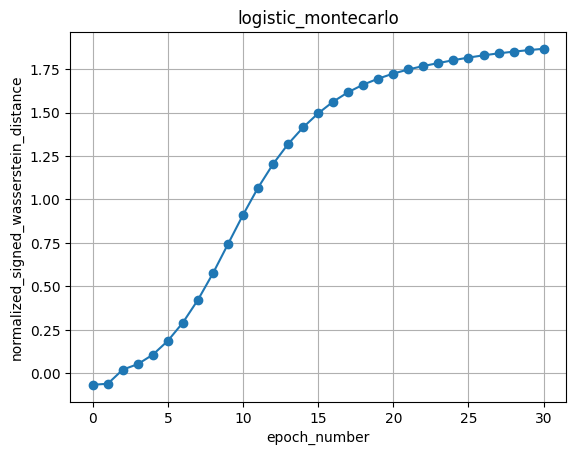

In [7]:
# l.plot_wasserstein_vs_epoch()
l.plot_normalized_signed_wasserstein_vs_epoch()

## Logistic map: dependence on the lengths of time series

In [8]:
def compile_loss_distributions() -> List[LossDistribution]:
    root, _, files = next(os.walk("20230626_distributions/logistic_vs_length/"))
    
    tslen_values = [int(f.removesuffix(".json")) for f in files]
    filepath_values = [os.path.join(root, f) for f in files]
    loss_distributions = [LossDistribution(path) for path in filepath_values]
    
    for l, tslen in zip(loss_distributions, tslen_values):
        l.tslen = tslen
        
    loss_distributions = sorted(loss_distributions, key=lambda l: l.tslen)
    return loss_distributions

loss_distributions = compile_loss_distributions()
print(len(loss_distributions))
loss_distributions[0].tslen

7


500

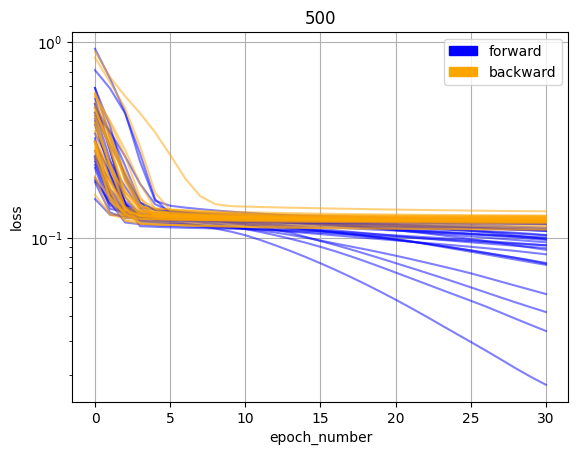

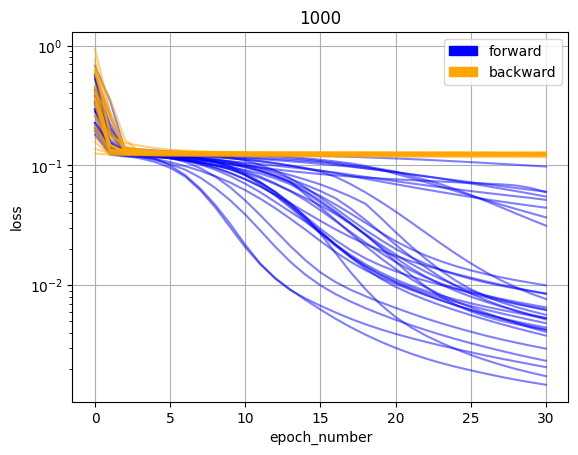

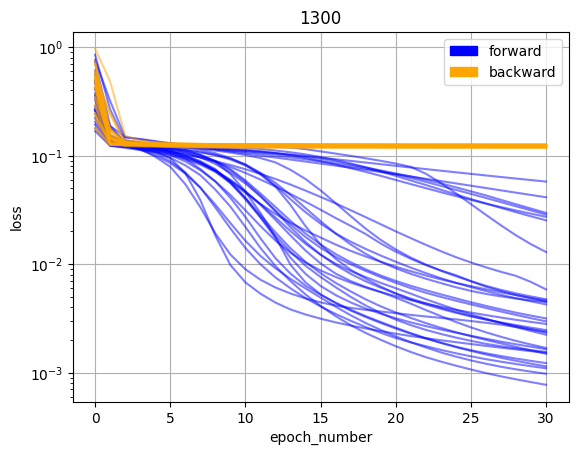

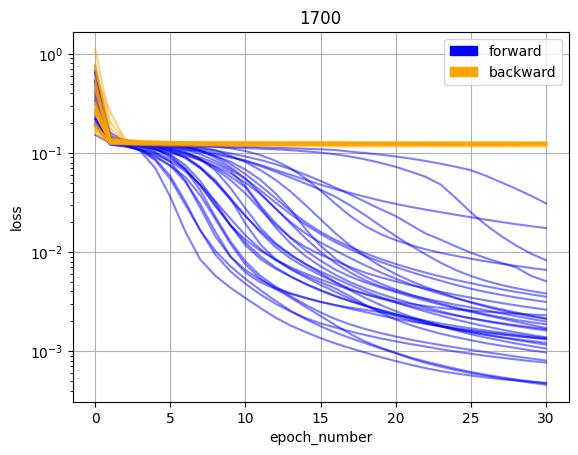

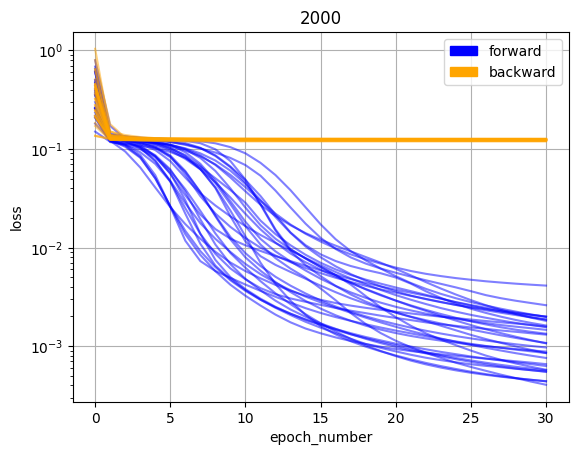

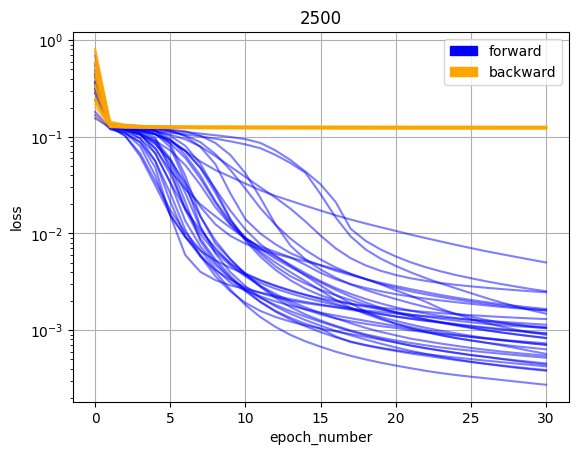

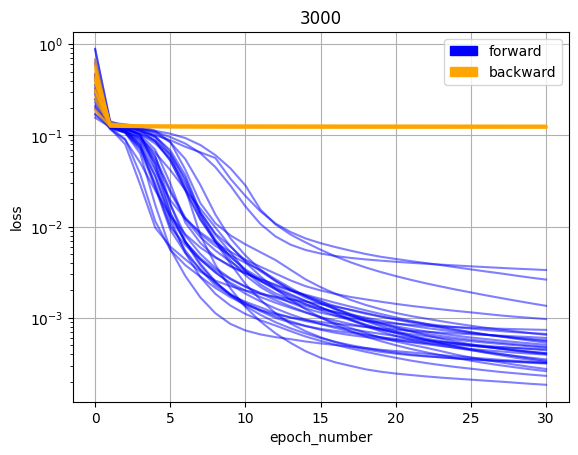

In [9]:
for l in loss_distributions:
    l.plot_learning_curves()

In [10]:
tslen_values = [l.tslen for l in loss_distributions]
intnormwas_values = [l.integral_normalized_wasserstein() for l in loss_distributions]

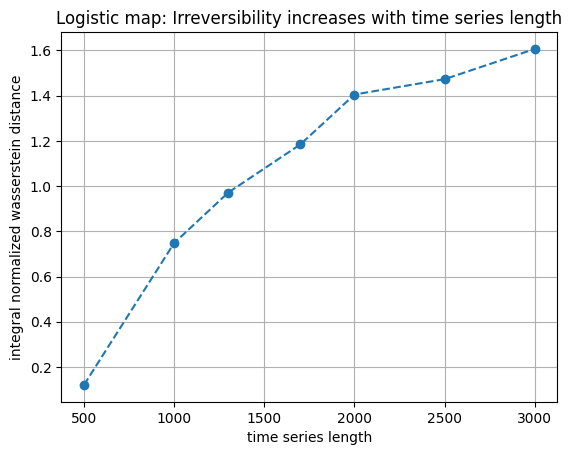

In [11]:
plt.plot(tslen_values, intnormwas_values, "o--")
plt.xlabel("time series length")
plt.ylabel("integral normalized wasserstein distance")
plt.title("Logistic map: Irreversibility increases with time series length")
plt.grid()

As the plot above illustrates, for the logistic map time series, integral wasserstein distance increases with time series length.
This might be for the wrong cause: we have the same number of epochs (30), but one epoch for tslen=500 is not the same amount of training as tslen=3000.
Instead of plotting integral wasserstein distance, let's plot wasserstein distance measured after the same number of training samples were seen by the model.

There are roughly tslen * window_len training samples in each epoch.
window_len=5 and num_epochs=30 for all tslen values.
If we look at tslen=3000 after 30 * (500 / 3000) = 5 epochs, the comparison to tslen=500 is fair and the same number of training samples was seen.
I implement this idea below.

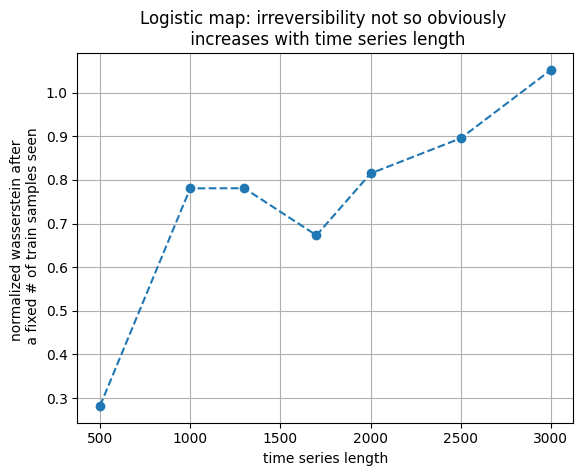

In [12]:
fair_epochs = [int(30 * 500 / tslen) for tslen in tslen_values]
fair_wasserstein_values = [l.normalized_wasserstein(e) for l, e in zip(loss_distributions, fair_epochs)]

plt.plot(tslen_values, fair_wasserstein_values, "o--")
plt.xlabel("time series length")
plt.ylabel("normalized wasserstein after \n a fixed # of train samples seen")
plt.title("Logistic map: irreversibility not so obviously \n increases with time series length")
plt.grid()

## Henon map

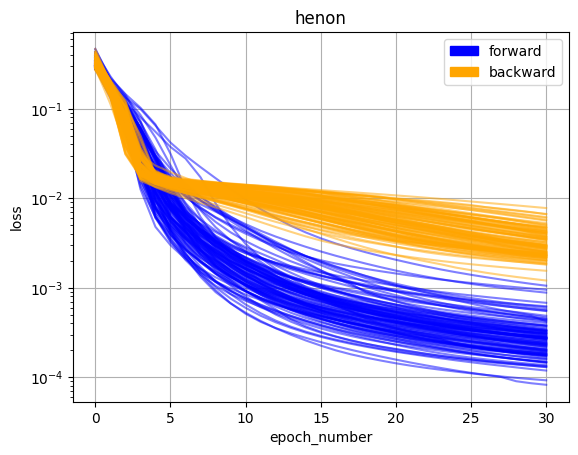

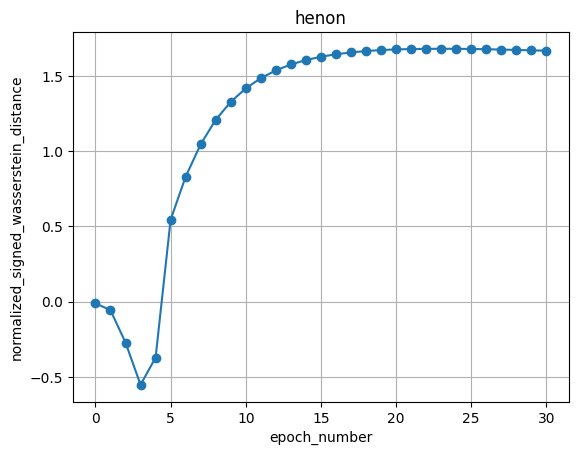

In [13]:
l = LossDistribution("20230626_distributions/henon.json")
l.plot_learning_curves()
l.plot_normalized_signed_wasserstein_vs_epoch()

In [14]:
l = LossDistribution("20230626_distributions/henon_montecarlo.json")

# Drop NaN values
mask = ~np.isnan(l.forward).any(axis=1)
l.forward = l.forward[mask]
l.backward = l.backward[mask]
assert not np.isnan(l.forward).any()
assert not np.isnan(l.forward).any()
l.num_runs = len(l.forward)

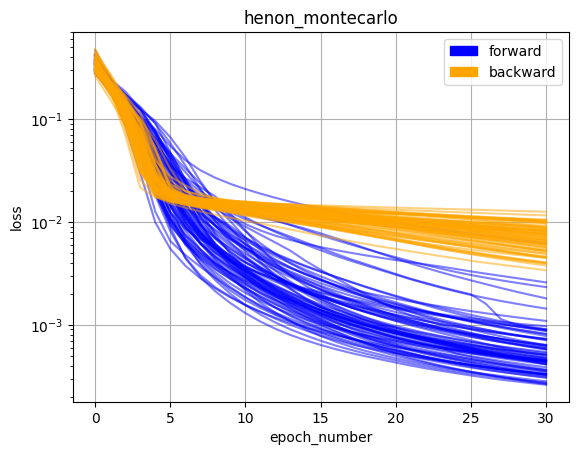

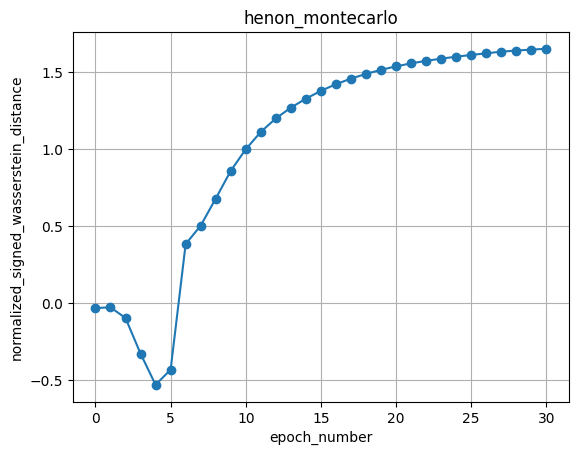

In [15]:
l.plot_learning_curves()
l.plot_normalized_signed_wasserstein_vs_epoch()

## Arnold's Cat map

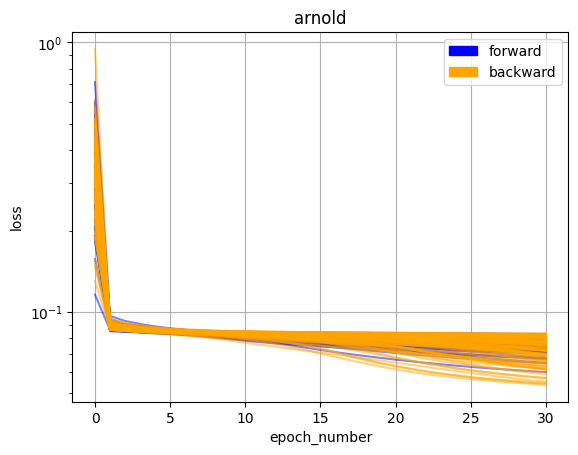

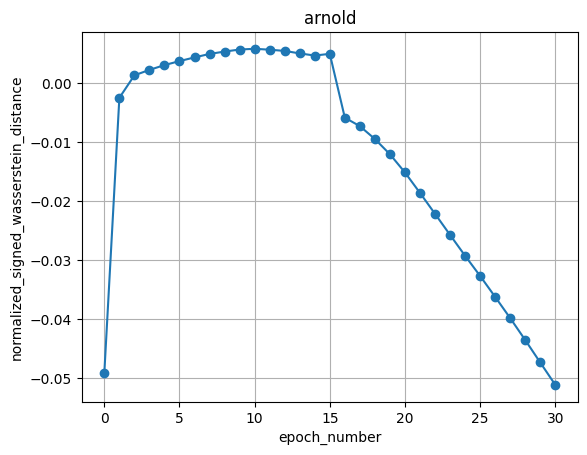

In [16]:
l = LossDistribution("20230626_distributions/arnold.json")
l.plot_learning_curves()
l.plot_normalized_signed_wasserstein_vs_epoch()

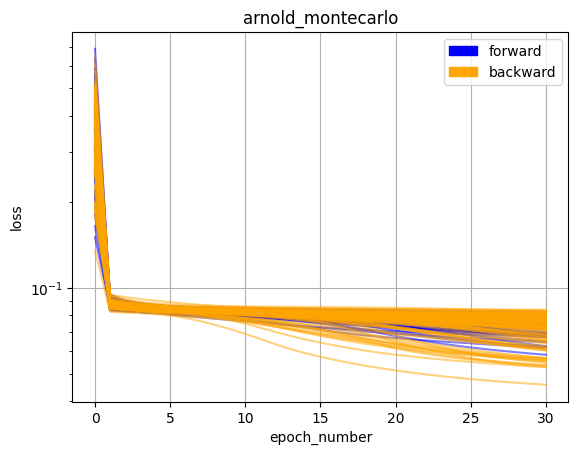

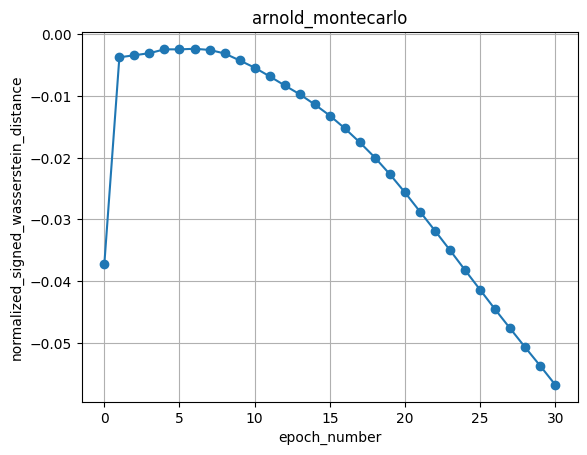

In [17]:
l = LossDistribution("20230626_distributions/arnold_montecarlo.json")
l.plot_learning_curves()
l.plot_normalized_signed_wasserstein_vs_epoch()

## ARCH

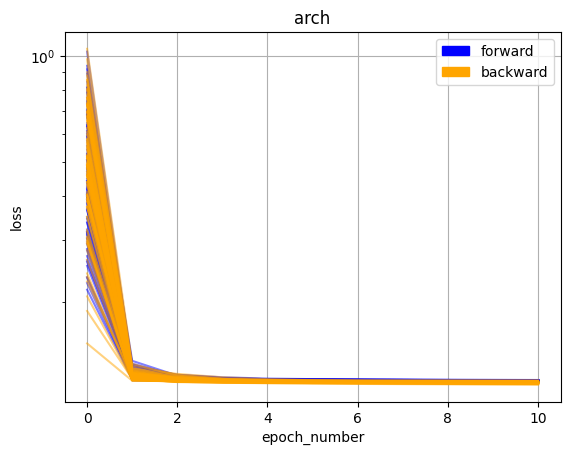

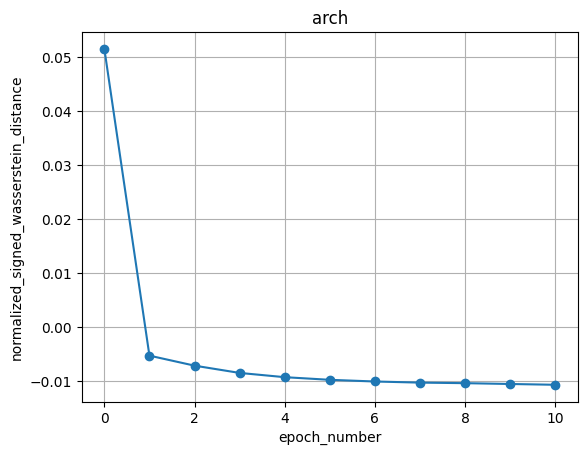

In [18]:
l = LossDistribution("20230626_distributions/arch.json")
l.plot_learning_curves()
l.plot_normalized_signed_wasserstein_vs_epoch()

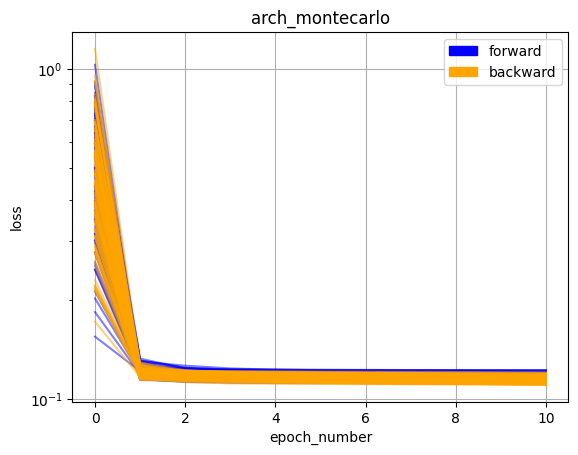

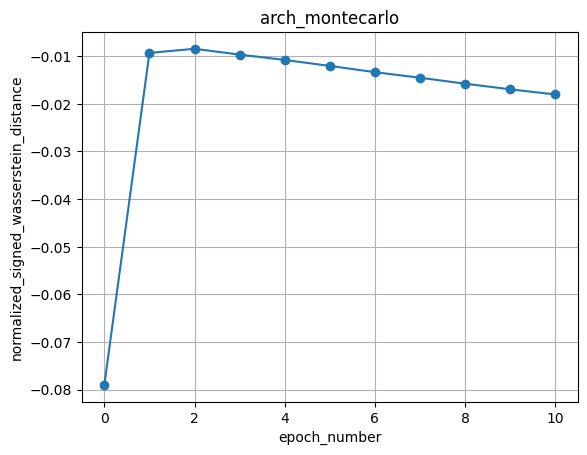

In [19]:
l = LossDistribution("20230626_distributions/arch_montecarlo.json")
l.plot_learning_curves()
l.plot_normalized_signed_wasserstein_vs_epoch()

## GARCH

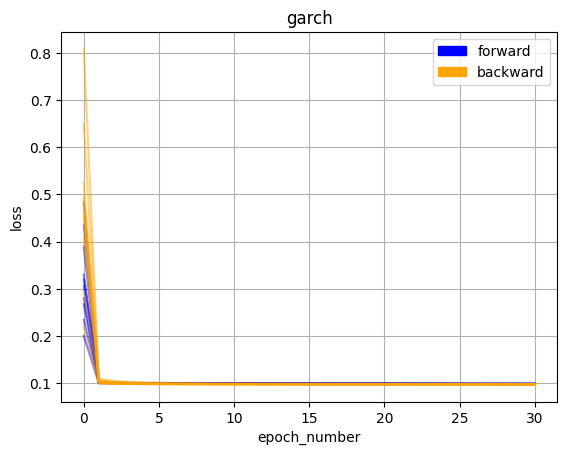

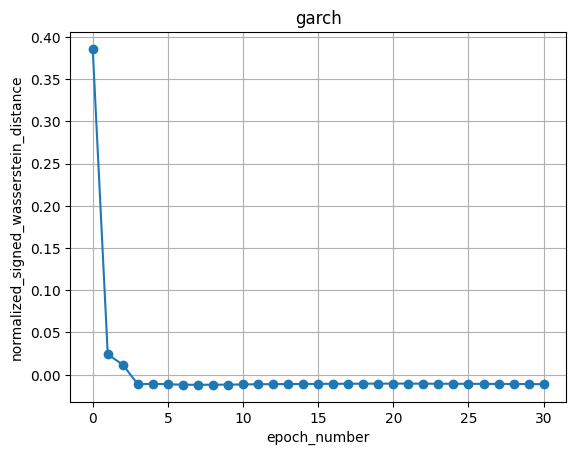

In [20]:
l = LossDistribution("20230626_distributions/garch.json")
l.plot_learning_curves(log_scale=False)
l.plot_normalized_signed_wasserstein_vs_epoch()

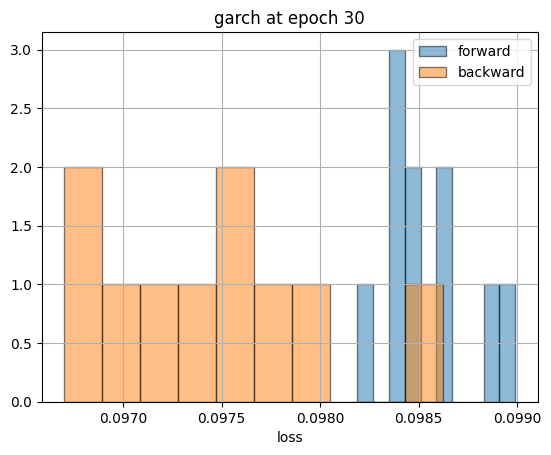

In [21]:
l.plot_distribution_at_epoch(30)